In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix,roc_auc_score,roc_curve,r2_score
from sklearn.naive_bayes import GaussianNB
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score,train_test_split
%matplotlib inline
import plotly.offline as py

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data-Science-ML-Capstone-Projects-master/winequality-white.csv',sep=';')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
data.shape

(4898, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


You Can See the Datatype of Each Attribute Here All are of Float Type other than quality its of int type

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is No Null Value in Data.

In [8]:
X= data.drop('quality',axis=1)
y=data['quality']

In [9]:
print(X.shape)
print(y.shape)

(4898, 11)
(4898,)


In [10]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433


**correlation** among the columns in the dataframe 

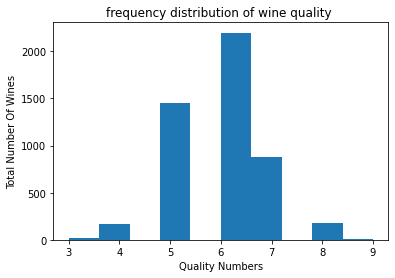

In [11]:
plt.hist(y)
plt.xlabel('Quality Numbers')
plt.ylabel('Total Number Of Wines')
plt.title('frequency distribution of wine quality ')

plt.show()

In [12]:
y= y.replace((3,4),(0,0))
y= y.replace((5,6),(1,1))
y= y.replace((7,8,9),(2,2,2))

Replacing Values to **3 Level**s. **3-4** equal to **0**.
**5-6** equal to **1**.
**7-9** equal to **2**

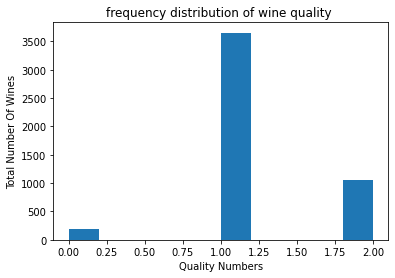

In [13]:
plt.hist(y)
plt.xlabel('Quality Numbers')
plt.ylabel('Total Number Of Wines')
plt.title('frequency distribution of wine quality ')

plt.show()

In [14]:
scaler = MinMaxScaler()

In [15]:
scaler.fit(X)
X=scaler.transform(X)

In [16]:
X

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]])

Data Is **Normalize** Now.

In [17]:
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_s)
  for i in range(3,15):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    r2_sc=accuracy_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.8183673469387756   For Random State  87  and model is  6


In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=87)
model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
pre=model.predict(X_test)
print(accuracy_score(y_test,pre))

0.8183673469387756


In [19]:
models = [DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]

Dividing Data Into to Different Random States And Finding The **Best the best Value of K**.

In [20]:
max_s=0
for r_s in range(40,90):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=r_s)
  for i in models:
    i.fit(X_train,y_train)
    pre=i.predict(X_test)
    r2_sc=accuracy_score(y_test,pre)
    if r2_sc>max_s:
      max_s=r2_sc
      final_State= r_s
      final_model=i
print()
print()

print("Max Score is ",max_s,"  For Random State ",final_State," and model is ", final_model )



Max Score is  0.8714285714285714   For Random State  82  and model is  RandomForestClassifier()


In [21]:
model =RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state= 82)
model.fit(X_train,y_train)
pre=model.predict(X_test)
r2_sc=accuracy_score(y_test,pre)

In [22]:
print(r2_sc)

0.8612244897959184


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



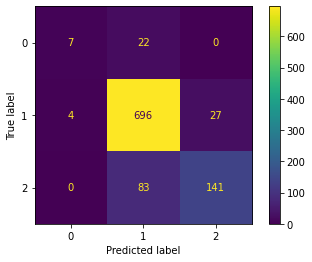

In [23]:
plot_confusion_matrix(model, X_test, y_test) 
plt.show()

Here os The **Confusion Matrix** Of Our Data

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [25]:
cm1 = confusion_matrix(y_test,pre)

In [26]:
cm1.shape

(3, 3)

In [27]:
print(cm1[0,0])

7


In [ ]:
print(classification_report(y_test,pre,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.38      0.07      0.12        42
           1       0.85      0.93      0.89       756
           2       0.65      0.53      0.58       182

    accuracy                           0.82       980
   macro avg       0.63      0.51      0.53       980
weighted avg       0.79      0.82      0.80       980



Here Is The  **Sensitivity and Specificity** Of The Model We Train.
recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity” In the Above Case its Recall Of Positive Class